# Pharmacy claim approval(exploaratory data analysis)
Jeeuhn Kim

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score,recall_score, f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading data
claim = pd.read_csv('dim_claims.csv')
claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335576 entries, 0 to 1335575
Data columns (total 5 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   dim_claim_id             1335576 non-null  int64  
 1   bin                      1335576 non-null  int64  
 2   drug                     1335576 non-null  object 
 3   reject_code              555951 non-null   float64
 4   pharmacy_claim_approved  1335576 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 50.9+ MB


In [3]:
# change bin numbers to letters to simplify notation

claim.loc[claim.bin ==  417380, 'bin'] = 'x'
claim.loc[claim.bin ==  417614, 'bin'] = 'y'
claim.loc[claim.bin ==  417740, 'bin'] = 'z'
claim.loc[claim.bin ==  999001, 'bin'] = 'w'

In [4]:
# one hot encoding of categorical variable 'drug'
for i in pd.get_dummies(claim.drug).columns :
    claim.loc[:,i] = pd.get_dummies(claim.drug).loc[:,i].copy()

In [5]:
# one hot encoding of categorical variable 'bin'
for i in pd.get_dummies(claim.bin).columns :
    claim.loc[:,i] = pd.get_dummies(claim.bin).loc[:, i].copy()

In [6]:
claim.columns

Index(['dim_claim_id', 'bin', 'drug', 'reject_code', 'pharmacy_claim_approved',
       'A', 'B', 'C', 'w', 'x', 'y', 'z'],
      dtype='object')

In [7]:
# make a new dataframe that only involves one hot encoded features
X = claim.iloc[:, 5:12].copy()
# make a new dataframe that only involves target variable
y = claim.iloc[:, 4].copy()

In [8]:
# split data into training set and test set with test set size =.2 stratified by the target classes
X_train, X_test, y_train, y_test= train_test_split(X.copy(), y.copy(),
                                  shuffle = True,
                                  random_state = 623,
                                  test_size = .2,
                                  stratify = claim.pharmacy_claim_approved)
type(X_train)

pandas.core.frame.DataFrame

In [9]:
# dataframe whose rows are drug types and the column is the corresponding approval rates
data = {'A': ['A', X_train[X_train.A == 1][y_train == 1].shape[0]/X_train[X_train.A == 1].shape[0]], 
        'B': ['B', X_train[X_train.B == 1][y_train == 1].shape[0]/X_train[X_train.B == 1].shape[0]], 
        'C': ['C', X_train[X_train.C == 1][y_train == 1].shape[0]/X_train[X_train.C == 1].shape[0]]}


df=pd.DataFrame.from_dict(data, orient='index',
                  columns=['type', 'approval_rate'])

[Text(0.5, 1.0, 'Approval rate for each BIN')]

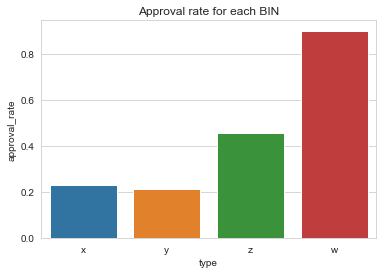

In [10]:
# dataframe whose rows are BINs and 
# the column is the corresponding approval rates
data = {'x': ['x',X_train[X_train.x == 1][y_train ==1].shape[0]/X_train[X_train.x == 1].shape[0]], 
        'y': ['y',X_train[X_train.y == 1][y_train ==1].shape[0]/X_train[X_train.y == 1].shape[0]], 
        'z': ['z',X_train[X_train.z == 1][y_train ==1].shape[0]/X_train[X_train.z == 1].shape[0]],
        'w': ['w',X_train[X_train.w == 1][y_train ==1].shape[0]/X_train[X_train.w == 1].shape[0]]}


df = pd.DataFrame.from_dict(data, orient='index',
                  columns=['type','approval_rate'])

sns.barplot(data=df, x="type", y='approval_rate').set(title = 'Approval rate for each BIN')

[Text(0.5, 1.0, 'Approval Rate for each Drug (Bin=x)')]

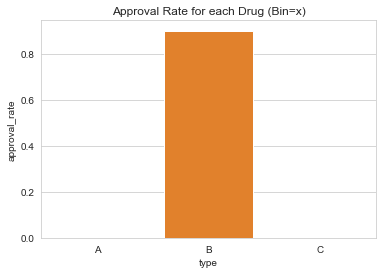

In [11]:
# dataframe whose rows are drug types and 
# the column is the corresponding approval rates restricted to BIN ='x'
data = {'A': ['A', X_train[X_train.A == 1][y_train == 1][X_train.x == 1].shape[0]/X_train[X_train.A == 1][X_train.x == 1].shape[0]], 
        'B': ['B', X_train[X_train.B == 1][y_train == 1][X_train.x == 1].shape[0]/X_train[X_train.B == 1][X_train.x == 1].shape[0]], 
        'C': ['C', X_train[X_train.C == 1][y_train == 1][X_train.x == 1].shape[0]/X_train[X_train.C == 1][X_train.x == 1].shape[0]]}


df=pd.DataFrame.from_dict(data, orient='index',
                  columns=['type', 'approval_rate'])


sns.barplot(data=df, x="type", y='approval_rate').set(title = 'Approval Rate for each Drug (Bin=x)' )

[Text(0.5, 1.0, 'Approval Rate for each Drug (Bin=y)')]

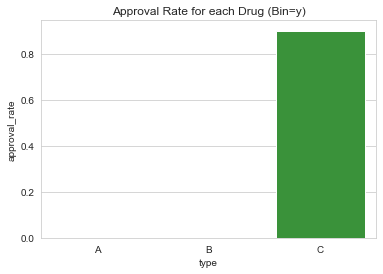

In [12]:
# dataframe whose rows are drug types and 
# the column is the corresponding approval rates restricted to BIN ='y'
data = {'A': ['A', X_train[X_train.A == 1][y_train == 1][X_train.y == 1].shape[0]/X_train[X_train.A == 1][X_train.y == 1].shape[0]], 
        'B': ['B', X_train[X_train.B == 1][y_train == 1][X_train.y == 1].shape[0]/X_train[X_train.B == 1][X_train.y == 1].shape[0]], 
        'C': ['C', X_train[X_train.C == 1][y_train == 1][X_train.y == 1].shape[0]/X_train[X_train.C == 1][X_train.y == 1].shape[0]]}


df=pd.DataFrame.from_dict(data, orient='index',
                  columns=['type', 'approval_rate'])


sns.barplot(data=df, x="type", y='approval_rate').set(title = 'Approval Rate for each Drug (Bin=y)' )

[Text(0.5, 1.0, 'Approval Rate for each Drug (Bin=z)')]

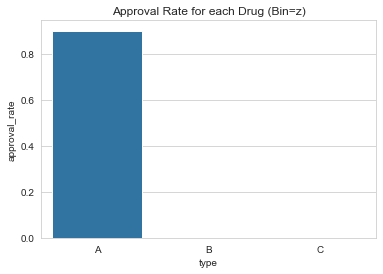

In [13]:
# dataframe whose rows are drug types and 
# the column is the corresponding approval rates restricted to BIN ='z'
data = {'A': ['A', X_train[X_train.A == 1][y_train == 1][X_train.z == 1].shape[0]/X_train[X_train.A == 1][X_train.z == 1].shape[0]], 
        'B': ['B', X_train[X_train.B == 1][y_train == 1][X_train.z == 1].shape[0]/X_train[X_train.B == 1][X_train.z == 1].shape[0]], 
        'C': ['C', X_train[X_train.C == 1][y_train == 1][X_train.z == 1].shape[0]/X_train[X_train.C == 1][X_train.z == 1].shape[0]]}


df=pd.DataFrame.from_dict(data, orient='index',
                  columns=['type', 'approval_rate'])


sns.barplot(data=df, x="type", y='approval_rate').set(title = 'Approval Rate for each Drug (Bin=z)' )

[Text(0.5, 1.0, 'Approval Rate for each Drug (Bin=x)')]

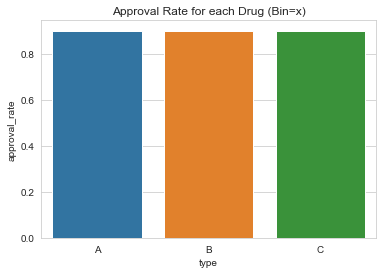

In [14]:
# dataframe whose rows are drug types and 
# the column is the corresponding approval rates restricted to BIN ='w'
data = {'A': ['A', X_train[X_train.A == 1][y_train == 1][X_train.w == 1].shape[0]/X_train[X_train.A == 1][X_train.w == 1].shape[0]], 
        'B': ['B', X_train[X_train.B == 1][y_train == 1][X_train.w == 1].shape[0]/X_train[X_train.B == 1][X_train.w == 1].shape[0]], 
        'C': ['C', X_train[X_train.C == 1][y_train == 1][X_train.w == 1].shape[0]/X_train[X_train.C == 1][X_train.w == 1].shape[0]]}


df=pd.DataFrame.from_dict(data, orient='index',
                  columns=['type', 'approval_rate'])


sns.barplot(data=df, x="type", y='approval_rate').set(title = 'Approval Rate for each Drug (Bin=x)' )